In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

Load the data set
Use the pandas module to read the taxi data from the file system. Check few records of the dataset.

In [2]:
boston = datasets.load_boston()
print(boston.data.shape, boston.target.shape)
print(boston.feature_names)

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data = pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Select the predictor and target variables
The target variable is MEDV which is the Median value of owner-occupied homes in $1000’s. The rest are predictor variables.

In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

Train test split
The whole dataset is split into training and test set. Training data is used to train the model and the test set is to evaluate how well the model performed.

In [6]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10,random_state=42,
shuffle=True)

Training/model fitting
Fit the model to selected supervised data.

In [7]:
# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model =  DecisionTreeRegressor(random_state=0)
model.fit(x_training_set, y_training_set)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

### DecisionTreeRegressor (criterion = ‘mse’, random_state =None , max_depth=None, min_samples_leaf=1,)

criterion: This function is used to measure the quality of a split in the decision tree regression. By default, it is ‘mse’ (the mean squared error), and it also supports ‘mae’ (the mean absolute error).
max_depth: This is used to add maximum depth to the decision tree after the tree is expanded.
min_samples_leaf: This function is used to add the minimum number of samples required to be present at a leaf node.

In [8]:
model_score = model.score(x_training_set,y_training_set)

# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.: ", model_score)

y_predicted = model.predict(x_test_set)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))

# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

coefficient of determination R^2 of the prediction.:  1.0
Mean squared error: 35.80
Test Variance score: 0.43


Accuracy report with test data :
Let’s check the goodness of the fit with the predictions visualized as a line.

#### The coefficient of determination (R2) for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features.

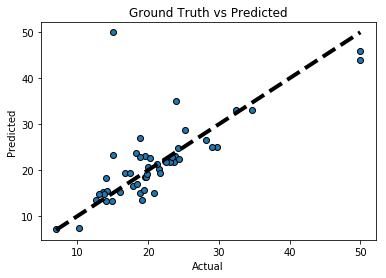

In [9]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

#### Conclusion:
We can see that our R2 score and MSE are both very good. This means that we have found a good fitting model to predict the median price value of a house. 

There can be a further improvement to the metric by doing some preprocessing before fitting the data

In [10]:
# Get numerical feature importances
importances = list(model.feature_importances_)  # feature importance is the 'Information gain' of each feature.
importances

[0.034788046675559965,
 0.000512359135608785,
 0.009704330556428033,
 0.0003741234868153628,
 0.0323924463857024,
 0.5701205809307898,
 0.01064469862143799,
 0.07553141653313128,
 0.00013774675627223964,
 0.011390701227544424,
 0.015430626483878974,
 0.01153798269632101,
 0.22743494051050955]

In [13]:
feature_list = data.columns

In [14]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances

[('CRIM', 0.03),
 ('ZN', 0.0),
 ('INDUS', 0.01),
 ('CHAS', 0.0),
 ('NOX', 0.03),
 ('RM', 0.57),
 ('AGE', 0.01),
 ('DIS', 0.08),
 ('RAD', 0.0),
 ('TAX', 0.01),
 ('PTRATIO', 0.02),
 ('B', 0.01),
 ('LSTAT', 0.23)]

In [15]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('RM', 0.57),
 ('LSTAT', 0.23),
 ('DIS', 0.08),
 ('CRIM', 0.03),
 ('NOX', 0.03),
 ('PTRATIO', 0.02),
 ('INDUS', 0.01),
 ('AGE', 0.01),
 ('TAX', 0.01),
 ('B', 0.01),
 ('ZN', 0.0),
 ('CHAS', 0.0),
 ('RAD', 0.0)]

In [16]:
# RM, LSTAT are most important features. Others have less importance. ZN, CHAS, RAD have no importance
# we can remove those variables that have no importance and the performance will not suffer. 